# Assignment 1

## [Question 1](#question-1)
## [Question 2](#question-2)
## [Question 3](#question-3)
## [Reflection](#reflection)

Dataset from National [Health and Nutrition Examination Survey](https://www.icpsr.umich.edu/web/NACDA/studies/25502)

In [164]:
# import python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

# config display to show all columns
pd.set_option('display.max_columns',None)

## <a id='question-1'>Question 1</a>

### Load Data


In [165]:
data = pd.read_csv('assignment1f_data.csv')
data

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,2.0,1,58614.08,1.43,112.0,48.0,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,1.0,3,122920.60,2.99,118.0,68.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,2.0,1,49050.06,2.97,154.0,56.0,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,1.0,5,42314.29,0.00,104.0,62.0,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


### Information of Data

In [166]:
# Check the standard deviation, mean, min/max of each column
data.describe()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,5735.000000,5208.000000,1731.000000,3379.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,5474.000000,5474.000000,5735.000000,5735.000000,5134.000000,5401.000000,5401.000000,5535.000000,5535.000000,5666.000000,5673.000000,5662.000000,5345.000000,5427.000000,5427.000000,5368.000000,4732.000000
mean,88678.583435,1.336406,1.587522,3.911512,1.607149,1.518919,48.052310,3.042371,1.185385,3.441725,2.628608,3.323801,40312.412352,2.403204,125.084614,69.516386,124.783017,69.346703,81.342676,166.142834,29.382197,38.576782,37.146987,33.112235,99.567213,1.915469
std,2882.139237,0.505514,0.623940,34.341839,0.571975,0.499686,18.431011,1.296793,0.491678,1.309700,2.366786,1.724670,38768.921774,1.601995,18.480873,12.881575,18.527012,13.022829,21.764409,10.079264,7.095921,3.873018,2.800784,5.268027,16.844109,0.414845
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5330.960000,0.000000,82.000000,0.000000,84.000000,0.000000,32.400000,129.700000,14.500000,26.000000,28.200000,17.100000,58.700000,1.000000
25%,86164.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,2.000000,1.000000,3.000000,1.000000,2.000000,17164.085000,1.060000,112.000000,62.000000,112.000000,62.000000,65.900000,158.700000,24.300000,36.000000,35.200000,29.500000,87.600000,2.000000
50%,88668.000000,1.000000,2.000000,2.000000,2.000000,2.000000,48.000000,3.000000,1.000000,4.000000,1.000000,3.000000,24654.860000,1.980000,122.000000,70.000000,122.000000,70.000000,78.200000,166.000000,28.300000,38.600000,37.100000,32.700000,98.300000,2.000000
75%,91178.500000,2.000000,2.000000,3.000000,2.000000,2.000000,63.000000,4.000000,1.000000,4.750000,5.000000,5.000000,42862.305000,3.740000,134.000000,78.000000,134.000000,78.000000,92.700000,173.500000,33.000000,41.200000,39.000000,36.200000,109.300000,2.000000
max,93702.000000,9.000000,9.000000,999.000000,9.000000,2.000000,80.000000,5.000000,9.000000,9.000000,77.000000,7.000000,233755.840000,5.000000,236.000000,120.000000,238.000000,144.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,9.000000


In [167]:
# Check data type
data.dtypes

SEQN          int64
ALQ101      float64
ALQ110      float64
ALQ130      float64
SMQ020        int64
RIAGENDR      int64
RIDAGEYR      int64
RIDRETH1      int64
DMDCITZN    float64
DMDEDUC2    float64
DMDMARTL    float64
DMDHHSIZ      int64
WTINT2YR    float64
INDFMPIR    float64
BPXSY1      float64
BPXDI1      float64
BPXSY2      float64
BPXDI2      float64
BMXWT       float64
BMXHT       float64
BMXBMI      float64
BMXLEG      float64
BMXARML     float64
BMXARMC     float64
BMXWAIST    float64
HIQ210      float64
dtype: object

In [168]:
# Check Null values
data.isna().sum()

SEQN           0
ALQ101       527
ALQ110      4004
ALQ130      2356
SMQ020         0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDCITZN       1
DMDEDUC2     261
DMDMARTL     261
DMDHHSIZ       0
WTINT2YR       0
INDFMPIR     601
BPXSY1       334
BPXDI1       334
BPXSY2       200
BPXDI2       200
BMXWT         69
BMXHT         62
BMXBMI        73
BMXLEG       390
BMXARML      308
BMXARMC      308
BMXWAIST     367
HIQ210      1003
dtype: int64

### Data Distribution

array([[<AxesSubplot: title={'center': 'SEQN'}>,
        <AxesSubplot: title={'center': 'ALQ101'}>,
        <AxesSubplot: title={'center': 'ALQ110'}>,
        <AxesSubplot: title={'center': 'ALQ130'}>,
        <AxesSubplot: title={'center': 'SMQ020'}>],
       [<AxesSubplot: title={'center': 'RIAGENDR'}>,
        <AxesSubplot: title={'center': 'RIDAGEYR'}>,
        <AxesSubplot: title={'center': 'RIDRETH1'}>,
        <AxesSubplot: title={'center': 'DMDCITZN'}>,
        <AxesSubplot: title={'center': 'DMDEDUC2'}>],
       [<AxesSubplot: title={'center': 'DMDMARTL'}>,
        <AxesSubplot: title={'center': 'DMDHHSIZ'}>,
        <AxesSubplot: title={'center': 'WTINT2YR'}>,
        <AxesSubplot: title={'center': 'INDFMPIR'}>,
        <AxesSubplot: title={'center': 'BPXSY1'}>],
       [<AxesSubplot: title={'center': 'BPXDI1'}>,
        <AxesSubplot: title={'center': 'BPXSY2'}>,
        <AxesSubplot: title={'center': 'BPXDI2'}>,
        <AxesSubplot: title={'center': 'BMXWT'}>,
        <Axes

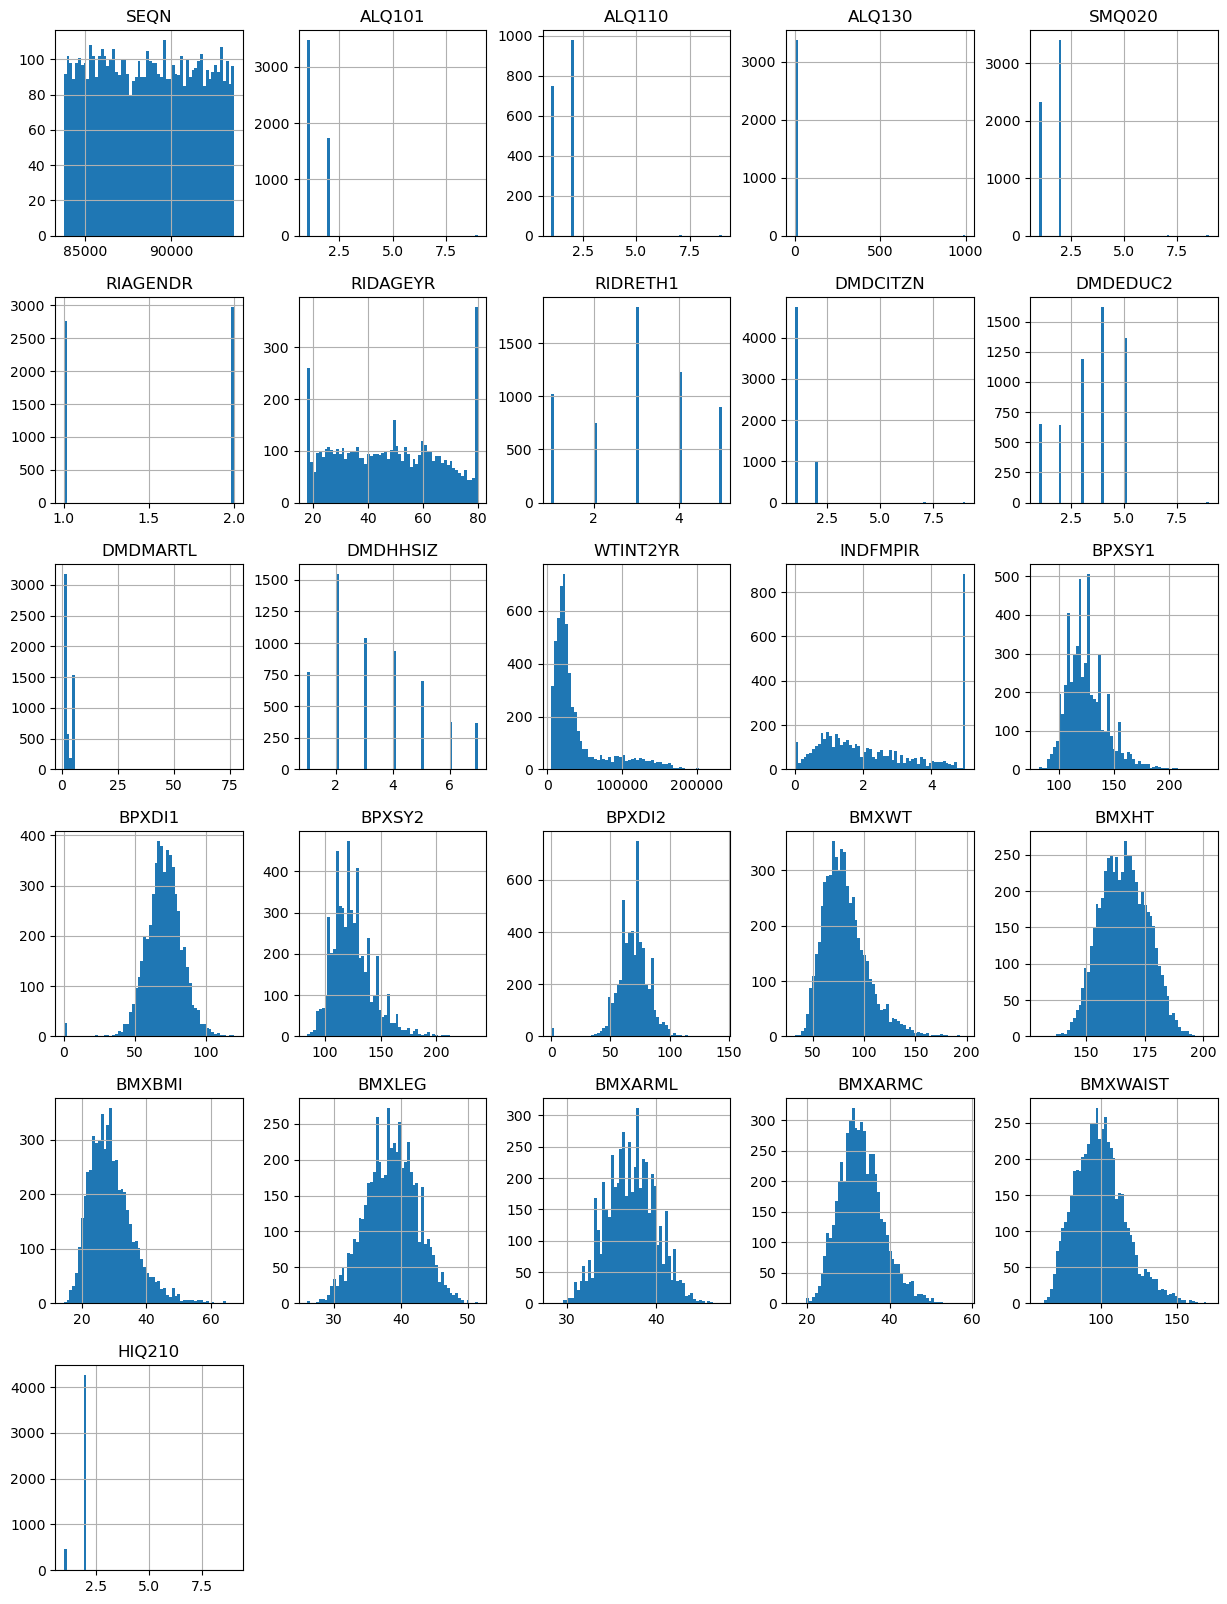

In [169]:
# Plot data distribution using histogram
data.hist(bins=60, figsize=(15,20))

In [170]:
# Check age Age
data['RIDAGEYR'].value_counts()

80    343
18    133
19    128
60    119
61    112
     ... 
74     52
78     47
76     44
77     43
79     35
Name: RIDAGEYR, Length: 63, dtype: int64

<AxesSubplot: >

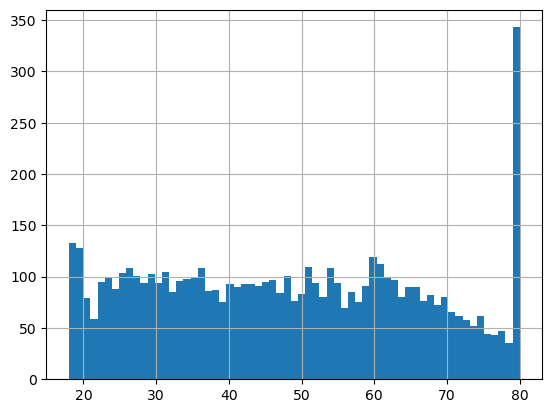

In [171]:
data['RIDAGEYR'].hist(bins=63)

### Numerical Data Correlation

In [172]:
# Age, total number of pp, mec weight, poverty, systolic_bp, diastolic_bp
data_numer = data[['RIDAGEYR','DMDHHSIZ','WTINT2YR','INDFMPIR','BPXSY1','BPXDI1']]
data_numer.corr()

,RIDAGEYR,DMDHHSIZ,WTINT2YR,INDFMPIR,BPXSY1,BPXDI1
RIDAGEYR,1.000000,-0.363930,-0.047806,0.028044,0.469233,-0.017459
DMDHHSIZ,-0.363930,1.000000,-0.145241,-0.182329,-0.163461,0.017016
WTINT2YR,-0.047806,-0.145241,1.000000,0.383668,-0.104422,0.042768
INDFMPIR,0.028044,-0.182329,0.383668,1.000000,-0.062853,0.068295
BPXSY1,0.469233,-0.163461,-0.104422,-0.062853,1.000000,0.316531
BPXDI1,-0.017459,0.017016,0.042768,0.068295,0.316531,1.000000


### Relationship between Age and Blood Pressure

In [173]:
# Scale of Blood Pressure
#       systolic mm
# Normal < 120
# Elevated 120 - 129
# High 120 - 139
# High2 > 140
# High3 > 180

# Relationship between age and systolic/diastolic blood pressure
# Average 1st and 2nd reading
data['systolic_bp'] = (data['BPXSY1']+data['BPXSY2'])/2
data['diastolic_bp'] = (data['BPXDI1']+data['BPXDI2'])/2

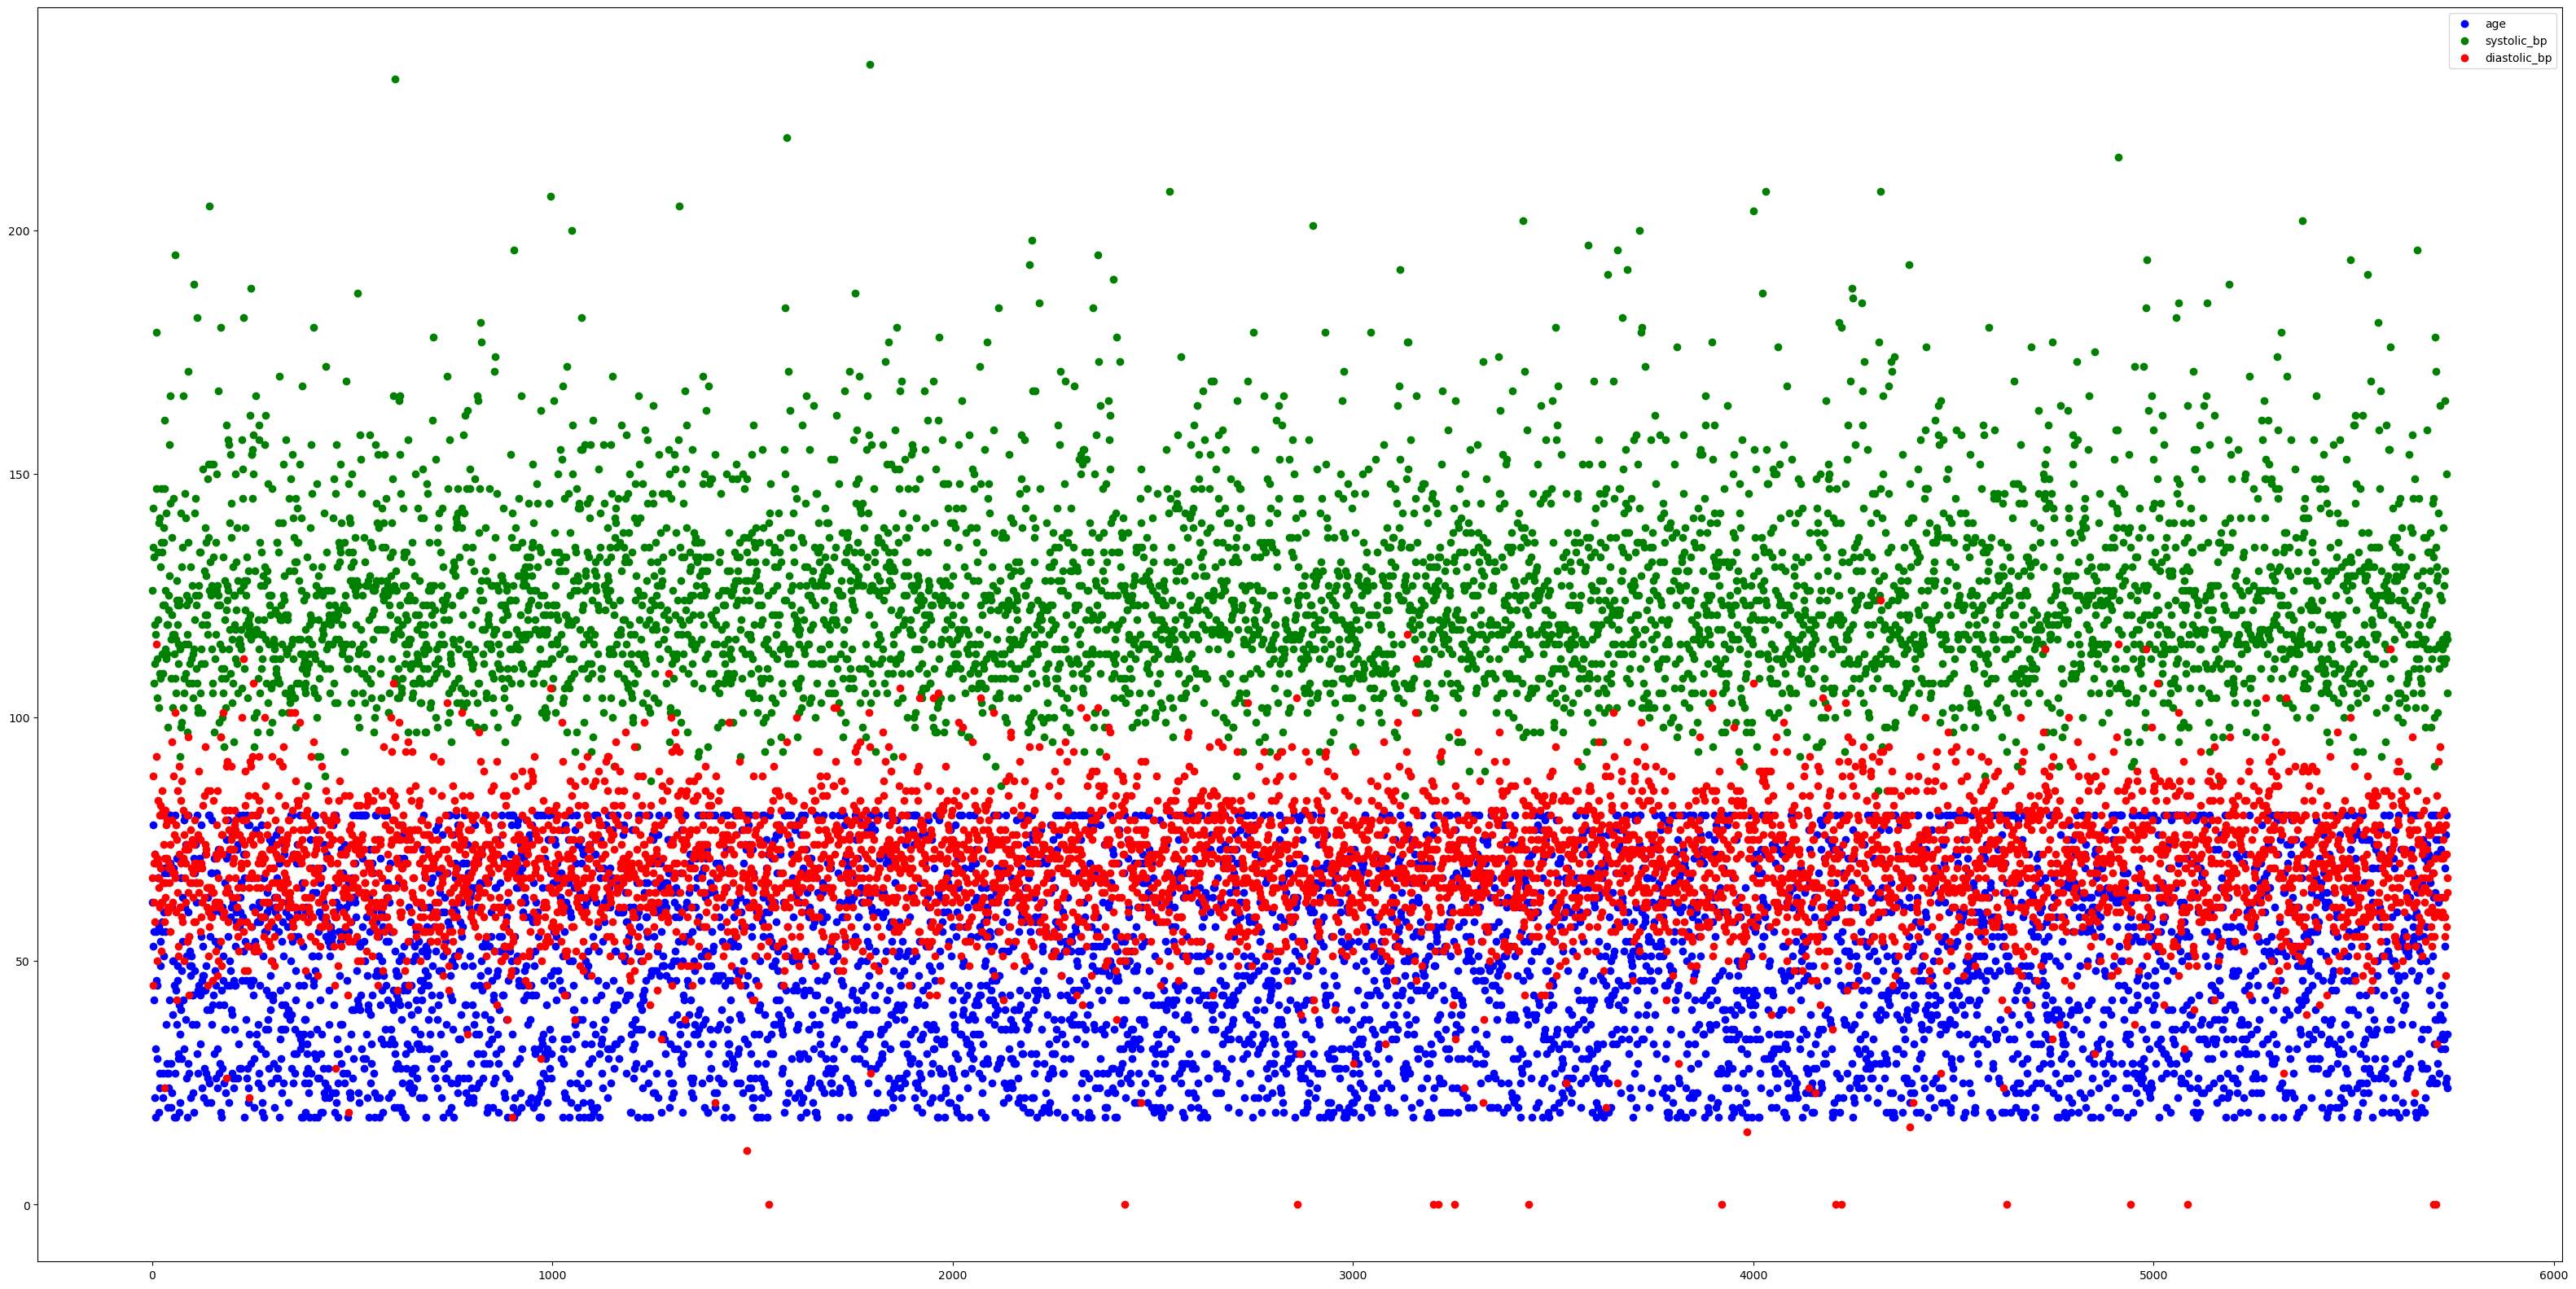

In [174]:
# remove all NaN data
x1 = list(range(1, data['RIDAGEYR'].notna().shape[0]+1))
x2 = list(range(1, data['systolic_bp'].notna().shape[0]+1))
x3 = list(range(1, data['diastolic_bp'].notna().shape[0]+1))

y1 = data['RIDAGEYR']
y2 = data['systolic_bp']
y3 = data['diastolic_bp']

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)

plt.scatter(x1, y1, label="age", c='b')
plt.scatter(x2, y2, label="systolic_bp", c='g')
plt.scatter(x3, y3, label="diastolic_bp", c='r')

plt.legend()
plt.show()

# Hard to observe the relationships

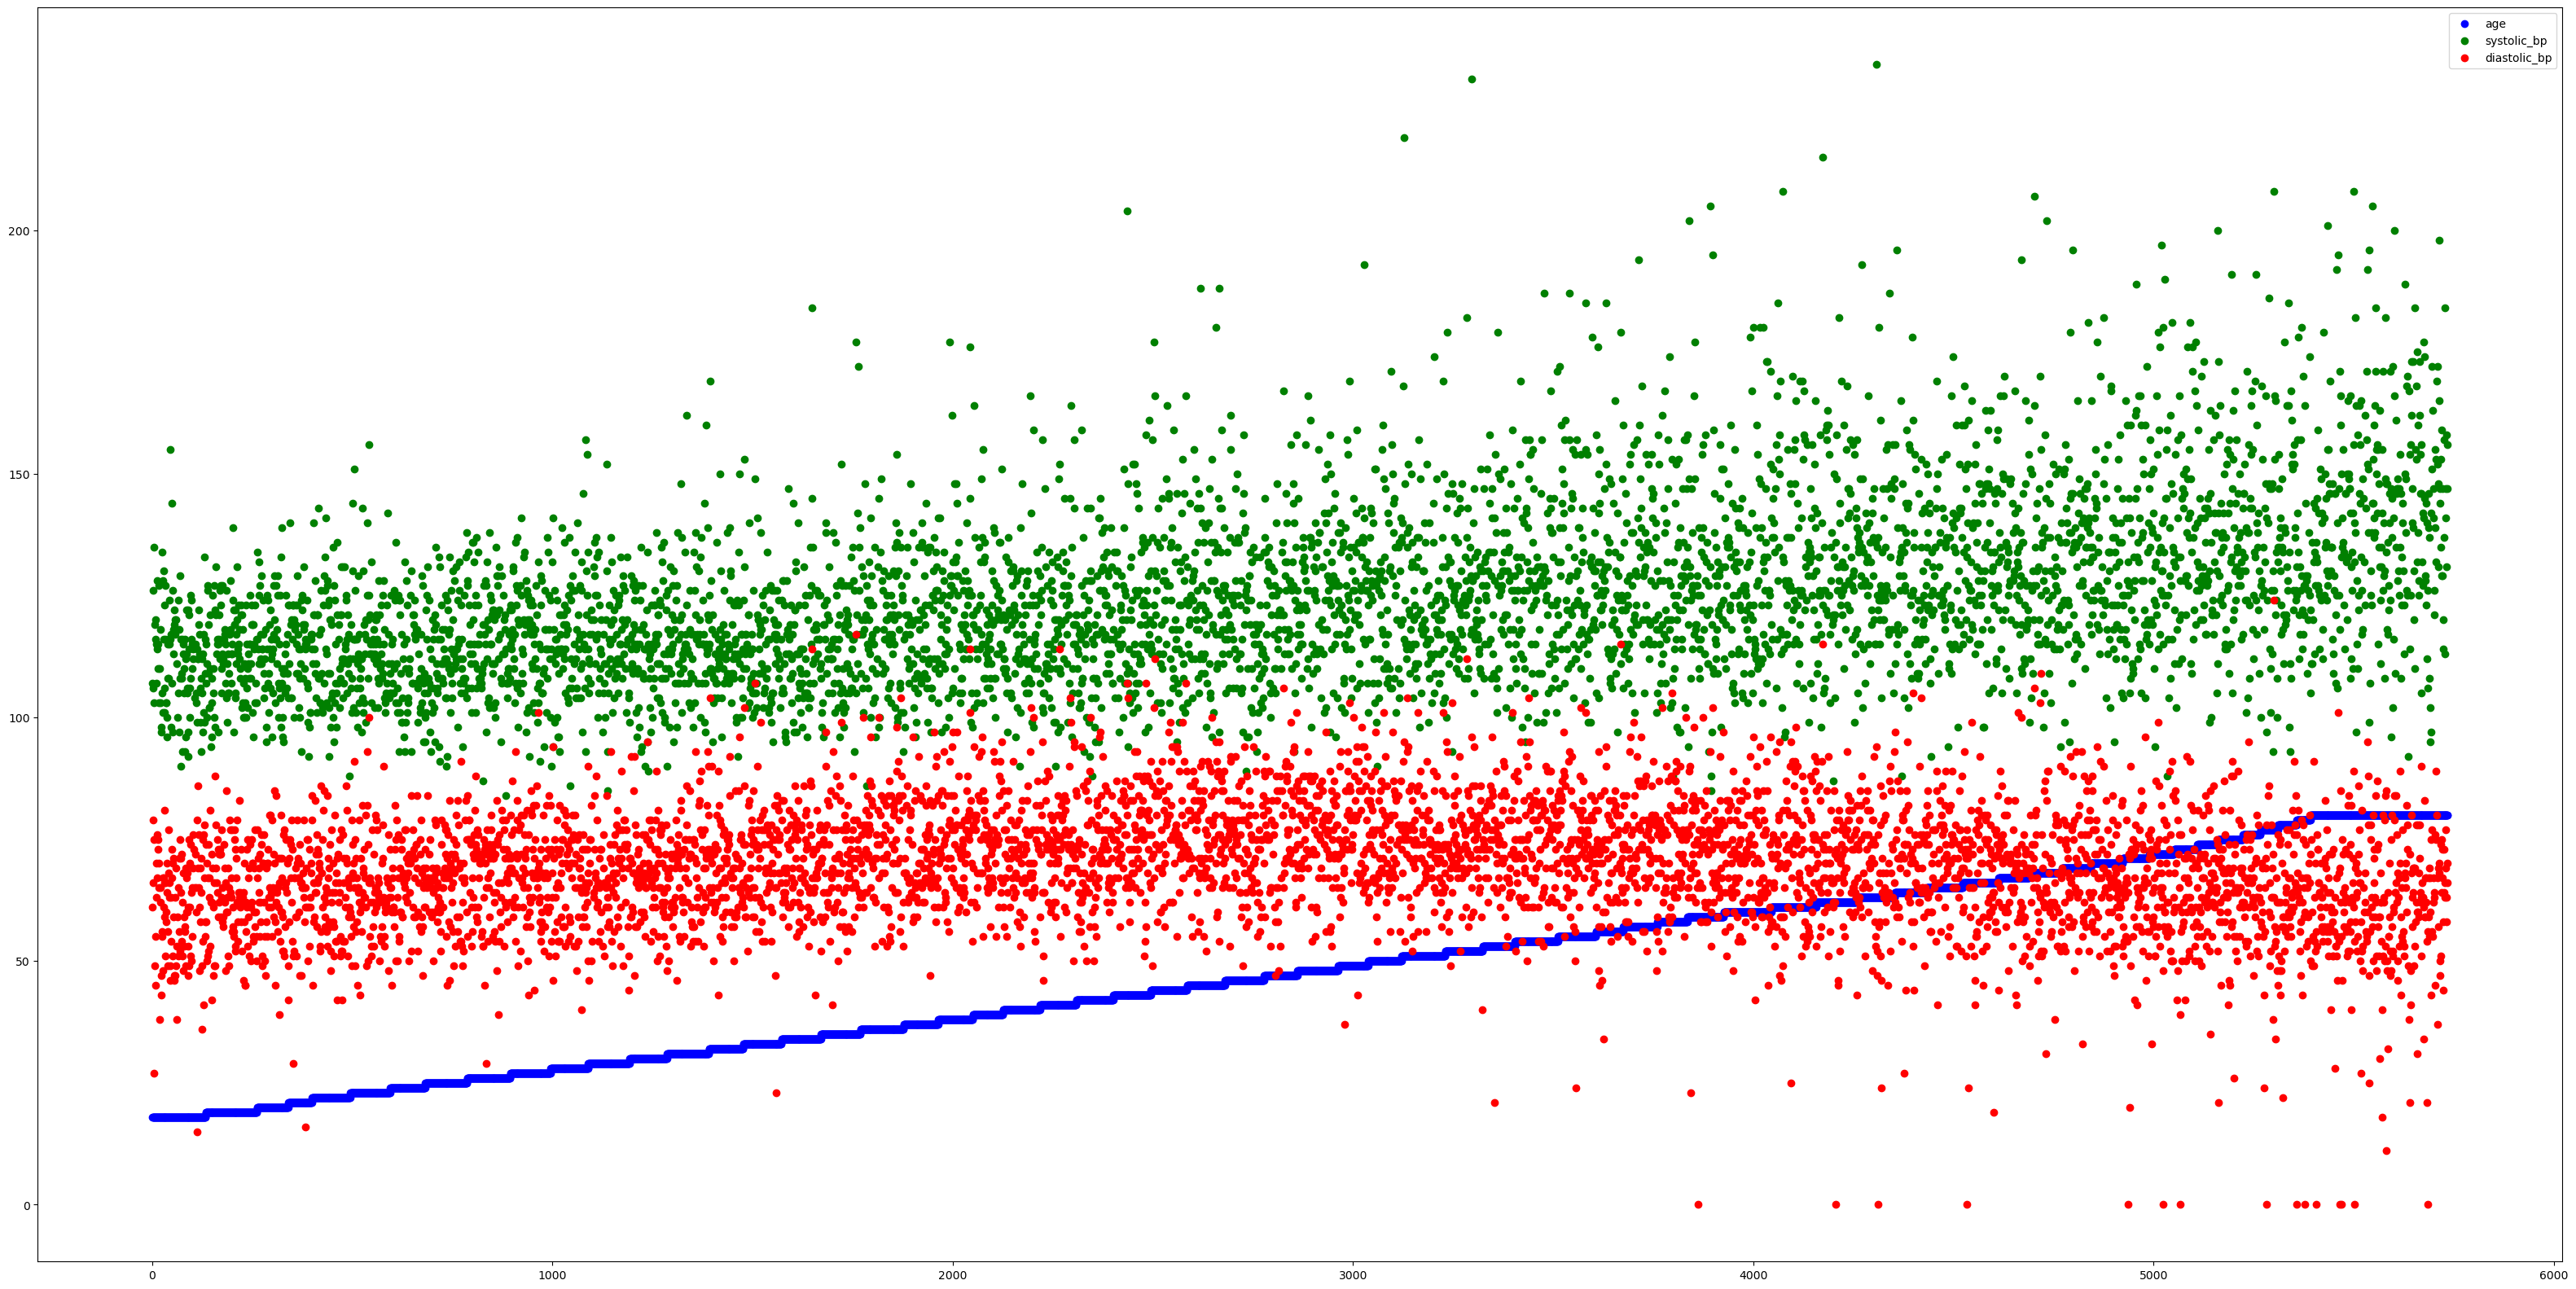

In [175]:
# Sort age to better observe the data
data = data.sort_values(by=['RIDAGEYR'])

x1 = list(range(1, data['RIDAGEYR'].notna().shape[0]+1))
x2 = list(range(1, data['systolic_bp'].notna().shape[0]+1))
x3 = list(range(1, data['diastolic_bp'].notna().shape[0]+1))

y1 = data['RIDAGEYR']
y2 = data['systolic_bp']
y3 = data['diastolic_bp']

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)


plt.scatter(x1, y1, label="age", c='b')
plt.scatter(x2, y2, label="systolic_bp", c='g')
plt.scatter(x3, y3, label="diastolic_bp", c='r')

plt.legend()
plt.show()
# use line regression to fit systolic_bp

**Findings**:
1. There is a positive correlation between 'systolic_bp' and 'RIDAGEYR' (Age at screening).
2. We can try using a linear regression model to fit systolic_bp and age. (next step)
3. For variables 'diastolic_bp' and 'RIDAGEYR' (Age at screening), there seems to be a non-linear correlation between them. (next step)
4. The number of samples who are 80 years old is significantly higher than others.
5. There seems to be a positive correlation between systolic blood pressure and diastolic blood pressure for the population between 18 and 45, and a negative correlation for the population between the age of 45 and 80.


## <a id='question-2'>Question 2</a>

In [176]:
# Count all sample who smokes
ratio_smo = data[data['SMQ020']==1][['RIAGENDR']].value_counts()
ratio_smo = ratio_smo.reset_index()

# Add Col 'precentage'
ratio_smo['precentage'] = [ratio_smo.iloc[0][0]/ratio_smo.sum()[0], ratio_smo.iloc[1][0]/ratio_smo.sum()[0]]
ratio_smo = ratio_smo.rename(columns={0:"nums"}, index={0:"men", 1:"women"})


<AxesSubplot: ylabel='precentage'>

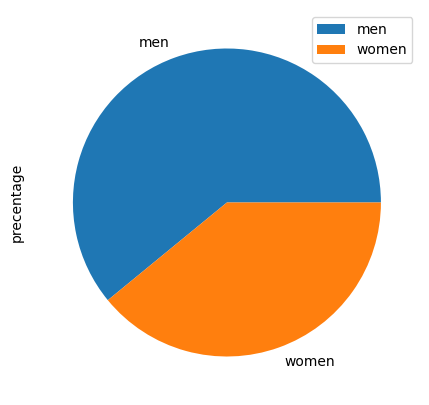

In [177]:
# Plot Pie chart
ratio_smo.plot.pie(y='precentage', figsize=(5, 5))

**Finding**:
The proportion of men who smoke is significantly larger then women who smoke.

## <a id='question-3'>Question 3</a>

### Precentage of People Graduated from College

In [178]:
# Count the population of all education levels
ratio_grads = data['DMDEDUC2'].value_counts()
ratio_grads  = ratio_grads.reset_index()
ratio_grads

,index,DMDEDUC2
0,4.0,1621
1,5.0,1366
2,3.0,1186
3,1.0,655
4,2.0,643
5,9.0,3


In [179]:
# Renaming column
ratio_grads = ratio_grads.rename(columns={"index":"edu_level", "DMDEDUC2":"count"}, index={1:"grads"})
ratio_grads

,edu_level,count
0,4.0,1621
grads,5.0,1366
2,3.0,1186
3,1.0,655
4,2.0,643
5,9.0,3


In [180]:
# Calc the precentage of college graduates
ratio_grads[ratio_grads['edu_level']==5.0]['count']/ratio_grads.sum()['count']

grads    0.249543
Name: count, dtype: float64

**Findings** 
Around 25% of the population have graduated from college.

<AxesSubplot: ylabel='count'>

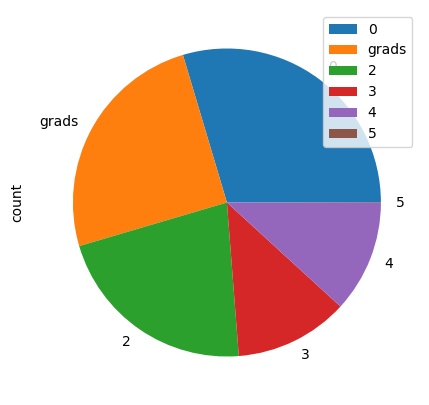

In [181]:
# Plot Pie Chart
ratio_grads.plot.pie(y='count', figsize=(5,5))

### Relationship between Education Level and Ratio of family income

In [182]:
# Average rofi for each edu level
ratio_rofi_edu = data.groupby(['DMDEDUC2']).mean()
ratio_rofi_edu[['INDFMPIR']]

,INDFMPIR
DMDEDUC2,
1.0,1.281756
2.0,1.561607
3.0,2.102760
4.0,2.473588
5.0,3.546983
9.0,0.980000


**Findings**
There is a positive correlation between ratio of family income and education level.

## <a id='reflection'>Reflection</a>
I would try to use an linear regression model to fit variales'systolic_bp' and 'age', and a non_linear regression model to fit variables 'diastolic_bp' and 'age'.